# Stock Analysis
- 포트폴리오 데이터 분석
- 포트폴리오 비율 그래프화
- 주식 비율 그래프화

In [1]:
#함수 호출
import numpy as np
import pandas as pd
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt

#데이터 생성
portfolio={
    'KO':[59.48,1],
    'HUN':[35.87,0.557011],
    'NEE':[76.59,1],
    'UNH':[536.38,0.31662],
    'HAL':[37.31,1],
    'DVN':[64.15,1.542892],
    'AAPL':[156.57,0.108477],
    'PSQ':[13.62,1.393538],
    'SQQQ':[54.08,1.10827]
}

enddate='2022-06-04'

,AVERPRICE,STOCKNUM,HOLDQUANTITY
UNH,536.38,0.316620,169.828636
DVN,64.15,1.542892,98.976522
NEE,76.59,1.000000,76.590000
SQQQ,54.08,1.108270,59.935242
KO,59.48,1.000000,59.480000
HAL,37.31,1.000000,37.310000
HUN,35.87,0.557011,19.979985
PSQ,13.62,1.393538,18.979988
AAPL,156.57,0.108477,16.984244


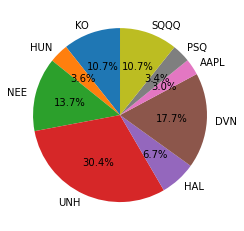

In [46]:
def portfolio_summary(company,value): #데이터프레임 형성, 시각화
    portfolio_dataf=pd.DataFrame(index=company, data=value, columns=['AVERPRICE','STOCKNUM'])
    portfolio_dataf["HOLDQUANTITY"]=portfolio_dataf["AVERPRICE"]*portfolio_dataf["STOCKNUM"]
    portfolio_dataf_sort=portfolio_dataf.sort_values("HOLDQUANTITY",ascending=False)
    portfolio_plot=plt.pie(portfolio_dataf["HOLDQUANTITY"],labels=company,autopct='%.1f%%',startangle=90)    
    return(portfolio_dataf_sort)
    return(portfolio_plot)

portfolio_summary(list(portfolio.keys()),list(portfolio.values())) #회사 리스트,회사 정보

In [19]:
def profit_dataframing(company,date): #수익률 데이터화
    downloadf=yf.download(company,start='2022-03-01',end=date,progress=False,group_by='ticker')
    freeset={}
    for cmp in company:
        profit_per=(downloadf[cmp]['Adj Close'][-1]/portfolio[cmp][0]-1)*100
        freeset[cmp]=profit_per
    profit_dataf=pd.Series(freeset).sort_values(ascending=False)
    return(profit_dataf)

profit_dataframing(list(portfolio.keys()),'2022-06-04') #회사 리스트,날짜

DVN     20.062349
HAL     12.436346
KO       5.867521
NEE      2.741875
HUN      1.198771
PSQ     -1.982376
AAPL    -7.146960
UNH     -9.465307
SQQQ   -11.316570
dtype: float64

In [29]:
#snp graph
msft = yf.Ticker("MSFT")
earn=msft.earnings
earn['Profitability']=earn['Earnings']/earn['Revenue']*100
earn

,Revenue,Earnings,Profitability
Year,,,
2018,110360000000,16571000000,15.015404
2019,125843000000,39240000000,31.181711
2020,143015000000,44281000000,30.962486
2021,168088000000,61271000000,36.451740


In [10]:
search= ['NRG','HAL','NEE','UNH','DVN']
holding = ['KO','HUN','NEE','UNH','HAL','DVN']
view=['HUN','QDEL','MU','NRG','DAR']

def financial_comparison(tickerlist): #제무제표 비교
    freeset={}
    i=0
    tickers = [yf.Ticker(ticker) for ticker in tickerlist]
    for ticker in tickers:
        freeset[tickerlist[i]]=[ticker.info["trailingPE"],
                                ticker.info["forwardPE"],
                                ticker.info["priceToBook"],
                                ticker.info["pegRatio"],
                                ticker.info["enterpriseToEbitda"],
                                ticker.info["returnOnEquity"],
                                ticker.info["revenuePerShare"],
                                ticker.info["totalCashPerShare"]]
        i+=1
    df=pd.DataFrame(data=freeset.values(),index=freeset.keys(),columns=['TPER','FPER','PBR','PEGR','EV/EB','ROE','EPS','CPS'])
    df_sort=df.sort_values('PEGR',ascending=True)
    return(df_sort)

financial_comparison(view)

,TPER,FPER,PBR,PEGR,EV/EB,ROE,EPS,CPS
MU,8.803021,5.581804,1.634303,0.26,4.433,0.20391,27.817,9.064
NRG,2.774524,10.701177,2.162933,0.32,2.609,1.22346,109.699,1.631
DAR,20.263350,12.370207,3.954454,0.34,16.745,0.21288,31.227,0.616
IP,10.383683,9.669405,1.963720,0.53,7.835,0.14611,51.966,3.567
HUN,6.729700,7.484536,1.755065,0.71,7.216,0.30070,41.445,3.843
QDEL,3.807145,19.176973,1.558482,0.81,1.887,0.51532,55.475,31.538
